In [1]:
import magma as m
import mantle

def DefineShiftRegister(n, init=0, has_ce=False, has_reset=False):
    class _ShiftRegister(m.Circuit):
        name = 'ShiftRegister_{}_{}_{}_{}'.format(n, init, has_ce, has_reset)
        IO = ['I', m.In(m.Bit), 'O', m.Out(m.Bit)] + \
               m.ClockInterface(has_ce, has_reset)
        @classmethod
        def definition(siso):
            ffs = mantle.FFs(n, init=init, has_ce=has_ce, has_reset=has_reset)
            reg = m.braid(ffs, foldargs={"I":"O"})
            reg(siso.I)
            m.wire(reg.O, siso.O)
            m.wireclock(siso, reg)
    return _ShiftRegister

In [2]:
m.compile("build/DefineShiftRegister.json", DefineShiftRegister(2, has_ce=True), output="coreir")
%cat build/DefineShiftRegister.json

magma:ERROR:Input port DFF_init0_has_ceTrue_has_resetFalse_has_async_resetFalse_inst0.CLK not driven
magma:ERROR:Input port DFF_init0_has_ceTrue_has_resetFalse_has_async_resetFalse_inst1.CLK not driven


cat: build/DefineShiftRegister.json: No such file or directory


In [3]:
from magma.simulator.coreir_simulator import CoreIRSimulator

N = 3
ShiftRegisterNCE = DefineShiftRegister(N, has_ce=True)
simulator = CoreIRSimulator(ShiftRegisterNCE, clock=ShiftRegisterNCE.CLK)
outputs = []
for j in range(2):
    simulator.advance()
for I, enable in [(1, 1), (0, 1), (1, 1), (0, 1), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1)]:
    simulator.set_value(ShiftRegisterNCE.I, bool(I))
    simulator.set_value(ShiftRegisterNCE.CE, bool(enable))
    for j in range(2):
        simulator.advance()
        O = simulator.get_value(ShiftRegisterNCE.O)
        CLK = simulator.get_value(ShiftRegisterNCE.CLK)
        outputs.append([O, I, enable, CLK])

magma:ERROR:Input port DFF_init0_has_ceTrue_has_resetFalse_has_async_resetFalse_inst0.CLK not driven
magma:ERROR:Input port DFF_init0_has_ceTrue_has_resetFalse_has_async_resetFalse_inst1.CLK not driven
magma:ERROR:Input port DFF_init0_has_ceTrue_has_resetFalse_has_async_resetFalse_inst2.CLK not driven


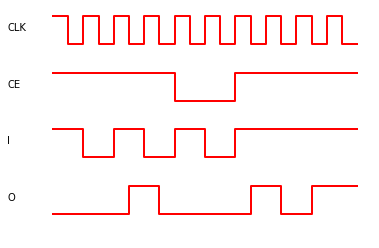

In [4]:
from magma.waveform import waveform

waveform(outputs, ["O", "I", "CE", "CLK"])